In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [54]:
%run ProcesarDatos.ipynb

# Adquisicion

In [3]:
data=leerExceltoFFT('../../../UPIITA/9 SEMESTRE/SENIALES/PROYECTO/OBJ_0304/data.xlsx')
data=(data.T/np.max(data,axis=1)).T

In [4]:
#target=np.repeat([])
target=np_utils.to_categorical(np.repeat([np.arange(0,16)],10))
print(target.shape)
print(target[0:15,:])

(160, 16)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 19999)
(48, 19999)
(112, 16)
(48, 16)


In [ ]:
for i in range (10):
    plt.subplot(10,2,i+(i+1))
    plt.plot(data[i,:])
    
    plt.subplot(10,2,i+(i+2))
    plt.plot(data[10+i,:])

# Entrenar neurona

In [6]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Con model.fit

In [7]:
model=Sequential()
model.add(Dense(24,input_dim=19999,activation='relu'))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
modelo_entrenado=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 256ms/step - loss: 2.5303 - accuracy: 0.1964 - val_loss: 2.3121 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 112ms/step - loss: 1.8819 - accuracy: 0.4464 - val_loss: 1.9624 - val_accuracy: 0.4167
Epoch 3/100
4/4 [==============================] - 0s 98ms/step - loss: 1.5132 - accuracy: 0.5893 - val_loss: 1.8900 - val_accuracy: 0.3750
Epoch 4/100
4/4 [==============================] - 0s 133ms/step - loss: 1.2864 - accuracy: 0.6339 - val_loss: 1.7261 - val_accuracy: 0.4167
Epoch 5/100
4/4 [==============================] - 0s 124ms/step - loss: 1.1079 - accuracy: 0.6696 - val_loss: 1.5861 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.9703 - accuracy: 0.7679 - val_loss: 1.4462 - val_accuracy: 0.5417
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8443 - accuracy: 0.8214 - val_loss: 1.3780 - val_accuracy: 0.5417
Epoch 8/100
4/4 

4/4 [==============================] - 0s 23ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.6183 - val_accuracy: 0.7500
Epoch 60/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.6258 - val_accuracy: 0.7500
Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.6238 - val_accuracy: 0.7500
Epoch 62/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.6176 - val_accuracy: 0.7708
Epoch 63/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.6155 - val_accuracy: 0.7708
Epoch 64/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.6163 - val_accuracy: 0.7708
Epoch 65/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.6218 - val_accuracy: 0.7708
Epoch 66/100
4/4 [========

In [20]:
np.atleast_2d(data[i,:]).shape

(1, 19999)

In [45]:
ans=[]
for i in range (160):
#     print(i)
    ans.append(np.squeeze(model.predict(np.atleast_2d(data[i,:]))))
#     print(ans.shape)
#     print('Dataset %i: %i' %(i//10,np.argmax(ans)))
#     print(np.sum((i//10)==np.argmax(ans)))

In [51]:
ar=np.arange(160)//10
# print(ar)
# print(np.shape(ans))
# print(np.argmax(ans,axis=1))
print(np.sum(ar==np.argmax(ans,axis=1)))

149


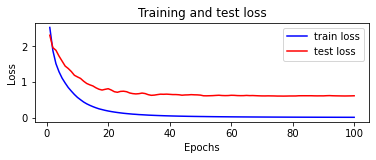

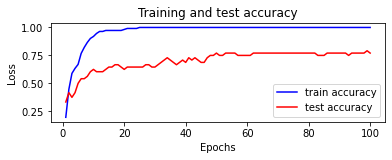

In [9]:
loss = modelo_entrenado.history['loss']
val_loss = modelo_entrenado.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.subplot(2,1,1)
plt.plot(epochs,loss, 'b', label='train loss')
plt.plot(epochs,val_loss, 'r', label='test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = modelo_entrenado.history['accuracy']
val_accuracy = modelo_entrenado.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.subplot(2,1,2)
plt.plot(epochs,accuracy, 'b', label='train accuracy')
plt.plot(epochs,val_accuracy, 'r', label='test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Con KerasClassifier

In [10]:
def my_nn():
    model=Sequential()
    model.add(Dense(16,input_dim=19999,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [12]:
modelo02=KerasClassifier(build_fn=my_nn,epochs=100,verbose=0)
kfold=KFold(n_splits=15,shuffle=True)
results=cross_val_score(modelo02,data,target,cv=kfold)
print(results.mean())

0.7933333436648051


# Probar red

In [69]:
dial01=['israel','lucero','merari','jesus']
dial02=['Buenos dias','Buenas noches','Como estas?','Donde estas?']

In [110]:
m1_direct='audio07.wav'
m1=audiotoFFT(m1_direct)
ans=np.argmax(np.squeeze(model.predict(np.atleast_2d(m1))))

In [111]:
print('%s dice: %s' % (dial01[ans//4],dial02[ans%4]))
print(ans)

jesus dice: Buenos dias
12
